# Spaning Tree Assigment
### Author: Kristian Mendoza

Se utilizará la librería networkx, que contiene funcionalidades importantes para grafos. Por ejemplo:
* Adición de Nodos y Edges cómo listas
* Visualización de los grafos
* Cálculo de shortest_paths
* Eliminar edges o nodos




In [2]:
import networkx as nx
import matplotlib.pyplot as plt 

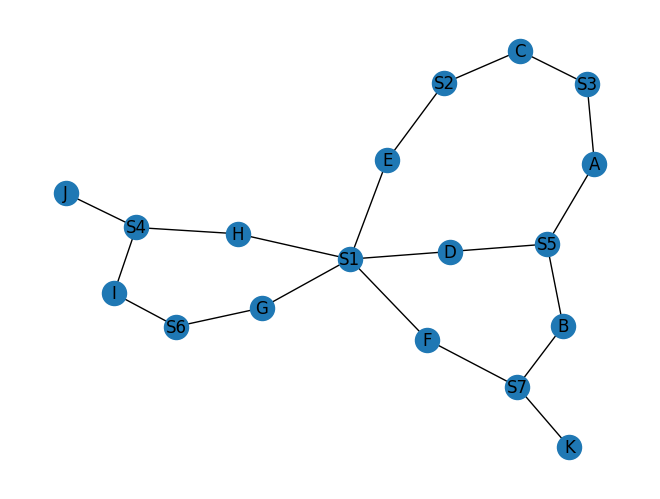

In [82]:

# Crear un nuevo grafo
graph = nx.Graph()

# Aniadir nodos a G con etiquetas de 'A' a 'K' para las LAN
nodes_LAN_test = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K']
graph.add_nodes_from(nodes_LAN_test)
#Aniadir nodos desde S1 a S7 para los switches\
nodes_switches_test = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7']
graph.add_nodes_from(nodes_switches_test)
#Aniadir edges entre nodos LAN y switches
edges_S1=[('E','S1'),('G','S1'),('D','S1'),('F','S1'),('H','S1')]
edges_S2=[('C','S2'),('E','S2')]
edges_S3=[('A','S3'),('C','S3')]
edges_S4=[('H','S4'),('J','S4'),('I','S4')]
edges_S5=[('B','S5'),('D','S5'),('A','S5')]
edges_S6=[('G','S6'),('I','S6')]
edges_S7=[('F','S7'),('K','S7'),('B','S7')]
graph.add_edges_from(edges_S1)
graph.add_edges_from(edges_S2)
graph.add_edges_from(edges_S3)
graph.add_edges_from(edges_S4)
graph.add_edges_from(edges_S5)
graph.add_edges_from(edges_S6)
graph.add_edges_from(edges_S7)
#graficar el grafo
nx.draw(graph, with_labels=True)


In [83]:
def spanning_tree_algorithm(graph,nodes_LAN,nodes_switches):
    
    #seleccionar el nodo switch con el id menor del grafo. El id es el numero que aparece en el nombre del nodo
    #por ejemplo, el nodo S1 tiene id 1, el nodo S2 tiene id 2, etc.
    root = None
    for node in graph.nodes():
        if node[0] == 'S':
            node_value = int(node[1:])
            if root is None or node_value < root:
                root = node_value
    
    #convertir el id a string para que coincida con el nombre del nodo
    root = 'S' + str(root)
    #print("El nodo raiz es el nodo con id menor, en este caso es el nodo", root)
    #para cada nodo LAN conseguir todos los caminos mas corto al nodo raiz con la funcion all_shortest_paths
    all_shortest_paths = {}
    for node in nodes_LAN:
        #Obtener todos los caminos mas cortos de cada nodo LAN al nodo raiz
        shortest_path_for__each_node = list(nx.all_shortest_paths(graph, node, root))
        #Guardar los caminos mas cortos de cada nodo LAN al nodo raiz en un diccionario
        all_shortest_paths[node] = shortest_path_for__each_node
    
    #imprimir los caminos mas cortos de cada nodo LAN al nodo raiz
    #print("Los caminos mas cortos de cada nodo LAN al nodo raiz son: ", all_shortest_paths)
    
    #de los caminos mas cortos de cada nodo LAN al nodo raiz, escoger el camino mas corto con el nodo switch con el id menor
    shortest_paths = {}
    for node, path_list in all_shortest_paths.items():
        shortest_path = min(path_list, key=lambda path: int(path[1][1:]))
        shortest_paths[node] = shortest_path
    print("El camino mas corto de cada nodo LAN al nodo raiz es: ", shortest_paths)

    
    #duplicar el gafo para no modificar el grafo original
    graph_sta = graph.copy()
    #eliminar todos los edges del grafo
    graph_sta.remove_edges_from(graph_sta.edges())
    
    #para cada nodo lan,convertir la lista de caminos mas cortos a una lista de edges.
    #De la manera que si 'A': ['A', 'S5', 'D', 'S1'] entonces 
    #edges = [('A', 'S5'), ('S5', 'D'), ('D', 'S1')]
    edges = {}
    for node, path in shortest_paths.items():
        node_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        edges[node] = node_edges
    #aniadir los edges al grafo
    for node, edge in edges.items():
        graph_sta.add_edges_from(edge)
    #print("El grafo despues de aniadir los edges de los caminos mas cortos de cada nodo LAN al nodo raiz es: ", graph_sta.edges)
    plt.figure(1)
    nx.draw(graph_sta, with_labels=True)
    plt.show()
    #Comparar para cada nodo lan si sus edges adyascentes al nodo switch estan en el camino mas corto al nodo raiz
    #si no estan en el camino mas corto al nodo raiz, entonces eliminarlos del grafo
    
    
    #si un nodo Switch no esta en los caminos mas cortos de los nodos LAN, entonces no es necesario aniadirlo al grafo
    #por lo tanto, eliminar los nodos switches que no estan en los caminos mas cortos de los nodos LAN
    for node in nodes_switches:
        if node not in [path[1] for path in shortest_paths.values()]:
            graph_sta.remove_node(node)
    print("El grafo despues de eliminar los nodos switches que no estan en los caminos mas cortos de los nodos LAN es: ", graph_sta.nodes)
    return graph_sta
    

El camino mas corto de cada nodo LAN al nodo raiz es:  {'A': ['A', 'S5', 'D', 'S1'], 'B': ['B', 'S5', 'D', 'S1'], 'C': ['C', 'S2', 'E', 'S1'], 'D': ['D', 'S1'], 'E': ['E', 'S1'], 'F': ['F', 'S1'], 'G': ['G', 'S1'], 'H': ['H', 'S1'], 'I': ['I', 'S4', 'H', 'S1'], 'J': ['J', 'S4', 'H', 'S1'], 'K': ['K', 'S7', 'F', 'S1']}


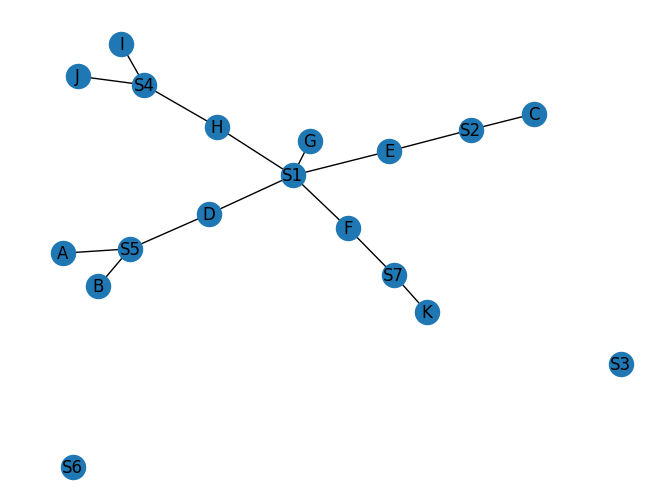

El grafo despues de eliminar los nodos switches que no estan en los caminos mas cortos de los nodos LAN es:  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'S1', 'S2', 'S4', 'S5', 'S7']


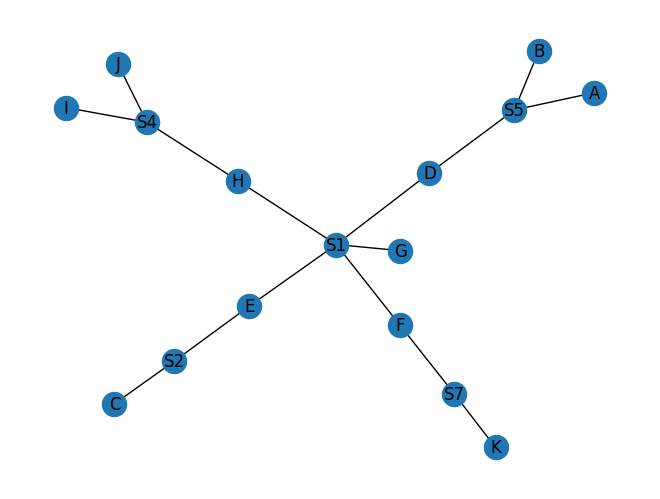

In [85]:
graph_sta = spanning_tree_algorithm(graph,nodes_LAN_test,nodes_switches_test)
#Se obtiene un grafo sin ciclos y con la optimización del switch con el id menor
plt.figure(2)
nx.draw(graph_sta, with_labels=True)
plt.show()